In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import functions
import glob2 as glob
import cartopy.crs as ccrs

In [2]:
clouddir = '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/'
tempdir = '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/feedback_input/'

In [3]:
# Calculate cloud profiles for piClim experiments

exp = 'piClim'
tslice = slice('2040-01-01', '2069-12-31')

pi_temp = xr.open_dataset(tempdir+'tas_piClim_final30years.nc')
pi_temp = functions.computeWeightedMean(pi_temp.mean('time'))
pi_temp = float(pi_temp['tas'].values)

cloud_files = glob.glob(clouddir+'*_'+exp+'.nc')
cloud_files.sort()
print(cloud_files)
cloud_ds = xr.open_mfdataset(cloud_files)

cloud_slice = cloud_ds.sel(time=tslice)
piClim_cloud = cloud_slice.groupby('time.month').mean('time')
piClim_cloud = piClim_cloud.rename({'month':'time'})

['/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/CLDICE_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/CLDLIQ_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/CLDLOW_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/CLDTOT_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/CLOUD_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/ICEFRAC_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/LANDFRAC_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/LHFLX_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/P0_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/PS_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/QFLX_piClim.nc', '/projects/NS9600K

In [20]:
# Plot piClim verticales profiles for the Arctic

Arctic_limit = 60
vert_regridded = piClim_cloud.sel(lat=slice(Arctic_limit,90))
piClim_Arctic = functions.computeWeightedMean(piClim_cloud.sel(lat=slice(Arctic_limit,90)))

fig, axs = plt.subplots(1,4, figsize=[15,5])
seasons = ['DJF', 'MAM', 'JJA', 'SON']

T_lim = 5
cldwater_lim = 0.05
cldfrc_lim = 40

for i, season in zip(range(4), seasons):
    ax1 = axs[i]
    piClim_Arctic_s = functions.computeSeasonalMean(piClim_Arctic, season=season)
    # Plot cloud profile for piClim climate
    ax1.set_title(season+', '+str(Arctic_limit)+'-90$^{\circ}$N')
    ax2 = ax1.twiny()
    ax3 = ax1.twiny()
    ax3.spines.top.set_position(("axes", 1.15))
    ax1.set_zorder(3)
    ax2.set_zorder(1)
    ax3.set_zorder(2)
    ax1.patch.set_visible(False)

    ax1.plot(piClim_Arctic_s['T']-273.15, piClim_Arctic_s['lev'], label='Temperature', color='tab:red')

    ax2.fill_betweenx(piClim_Arctic_s['lev'], np.zeros(len(piClim_Arctic_s['lev'])), piClim_Arctic_s['CLDLIQ']*1000, label='Liquid', zorder=1)
    ax2.fill_betweenx(piClim_Arctic_s['lev'], np.zeros(len(piClim_Arctic_s['lev'])), piClim_Arctic_s['CLDICE']*1000, label='Ice', color='lightskyblue', zorder=2)

    ax3.plot(piClim_Arctic_s['CLOUD']*100, piClim_Arctic_s['lev'], color='black', label='Cloud fraction')

    ax2.legend()

    ax1.set_ylim([1000, 100])
    ax1.set_xlim([-60, T_lim])
    ax2.set_xlim([0, cldwater_lim])
    ax3.set_xlim([0, cldfrc_lim])

    ax1.set_xlabel('Temperature $^{\circ}$C')
    ax2.set_xlabel('Cloud water amount gkg$^{-1}$')
    ax3.set_xlabel('Cloud fraction %')

    ax1.xaxis.label.set_color('tab:red')
    ax2.xaxis.label.set_color('tab:blue')
    ax3.xaxis.label.set_color('black')
    ax1.tick_params(axis='x', colors='tab:red')
    ax2.tick_params(axis='x', colors='tab:blue')
    ax3.tick_params(axis='x', colors='black')


ValueError: Dimension(s) 'lon' do not exist. Expected one or more of {'time', 'lat'}

In [ ]:
# Plot piClim verticales profiles for the Arctic

Arctic_limit = 60
piClim_Arctic = functions.computeWeightedMean(piClim_cloud.sel(lat=slice(Arctic_limit,90)))

fig, axs = plt.subplots(1,4, figsize=[15,5])
seasons = ['DJF', 'MAM', 'SON', 'JJA']

T_lim = 5
cldwater_lim = 0.05
cldfrc_lim = 40

for i, season in zip(range(4), seasons):
    ax1 = axs[i]
    piClim_Arctic_s = functions.computeSeasonalMean(piClim_Arctic, season=season)
    # Plot cloud profile for piClim climate
    ax1.set_title(season+', '+str(Arctic_limit)+'-90$^{\circ}$N')
    ax2 = ax1.twiny()
    ax3 = ax1.twiny()
    ax3.spines.top.set_position(("axes", 1.15))
    ax1.set_zorder(3)
    ax2.set_zorder(1)
    ax3.set_zorder(2)
    ax1.patch.set_visible(False)

    ax1.plot(piClim_Arctic_s['T']-273.15, piClim_Arctic_s['lev'], label='Temperature', color='tab:red')

    ax2.fill_betweenx(piClim_Arctic_s['lev'], np.zeros(len(piClim_Arctic_s['lev'])), 
                      piClim_Arctic_s['AWNI']/piClim_Arctic_s['FREQI'], label='In-cloud ice #', zorder=1)

    ax3.plot(piClim_Arctic_s['CLOUD']*100, piClim_Arctic_s['lev'], color='black', label='Cloud fraction')

    ax2.legend()

    ax1.set_ylim([1000, 100])
    ax1.set_xlim([-60, T_lim])
    ax2.set_xlim([0, cldwater_lim])
    ax3.set_xlim([0, cldfrc_lim])

    ax1.set_xlabel('Temperature $^{\circ}$C')
    ax2.set_xlabel('Cloud water amount gkg$^{-1}$')
    ax3.set_xlabel('Cloud fraction %')

    ax1.xaxis.label.set_color('tab:red')
    ax2.xaxis.label.set_color('tab:blue')
    ax3.xaxis.label.set_color('black')
    ax1.tick_params(axis='x', colors='tab:red')
    ax2.tick_params(axis='x', colors='tab:blue')
    ax3.tick_params(axis='x', colors='black')


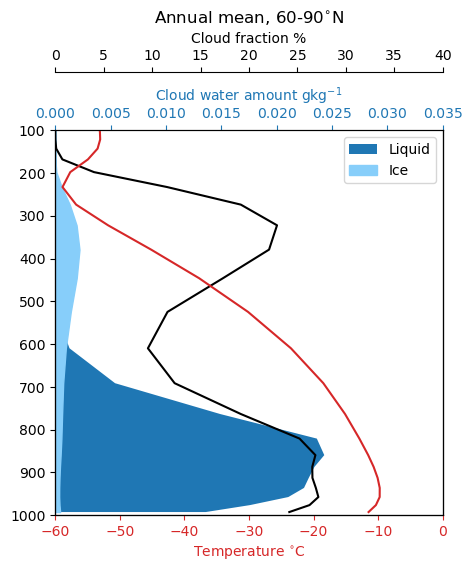

In [6]:
# Plot piClim verticales profiles for the Arctic

Arctic_limit = 60
piClim_Arctic = functions.computeWeightedMean(piClim_cloud.sel(lat=slice(Arctic_limit,90)))

fig, ax1 = plt.subplots(1,1, figsize=[5,5])

T_lim = 0
cldwater_lim = 0.035
cldfrc_lim = 40

piClim_Arctic_s = piClim_Arctic.mean('time')
# Plot cloud profile for piClim climate
ax1.set_title('Annual mean, '+str(Arctic_limit)+'-90$^{\circ}$N')
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax3.spines.top.set_position(("axes", 1.15))
ax1.set_zorder(3)
ax2.set_zorder(1)
ax3.set_zorder(2)
ax1.patch.set_visible(False)

ax1.plot(piClim_Arctic_s['T']-273.15, piClim_Arctic_s['lev'], label='Temperature', color='tab:red')

ax2.fill_betweenx(piClim_Arctic_s['lev'], np.zeros(len(piClim_Arctic_s['lev'])), piClim_Arctic_s['CLDLIQ']*1000, label='Liquid', zorder=1)
ax2.fill_betweenx(piClim_Arctic_s['lev'], np.zeros(len(piClim_Arctic_s['lev'])), piClim_Arctic_s['CLDICE']*1000, label='Ice', color='lightskyblue', zorder=2)

ax3.plot(piClim_Arctic_s['CLOUD']*100, piClim_Arctic_s['lev'], color='black', label='Cloud fraction')

ax2.legend()

ax1.set_ylim([1000, 100])
ax1.set_xlim([-60, T_lim])
ax2.set_xlim([0, cldwater_lim])
ax3.set_xlim([0, cldfrc_lim])

ax1.set_xlabel('Temperature $^{\circ}$C')
ax2.set_xlabel('Cloud water amount gkg$^{-1}$')
ax3.set_xlabel('Cloud fraction %')

ax1.xaxis.label.set_color('tab:red')
ax2.xaxis.label.set_color('tab:blue')
ax3.xaxis.label.set_color('black')
ax1.tick_params(axis='x', colors='tab:red')
ax2.tick_params(axis='x', colors='tab:blue')
ax3.tick_params(axis='x', colors='black')


In [7]:
experiments = ['abrupt-0_5xCO2', 'abrupt-2xCO2', 'abrupt-4xCO2']
interval = 15
ds_list = []
dT_list = []

if interval==15:
    tslicelist = [slice('1920-01-01', '1934-12-31'), slice('1935-01-01', '1949-12-31'),
                slice('1950-01-01', '1964-12-31'), slice('1965-01-01', '1979-12-31'),
                slice('1980-01-01', '1994-12-31'), slice('1995-01-01', '2009-12-31'),
                slice('2010-01-01', '2024-12-31'), slice('2025-01-01', '2039-12-31'),
                slice('2040-01-01', '2054-12-31'), slice('2055-01-01', '2069-12-31')]
elif interval==10:
    tslicelist = [slice('1920-01', '1929-12'), slice('1930-01-01', '1939-12-31'),
            slice('1940-01-01', '1949-12-31'), slice('1950-01-01', '1959-12-31'),
            slice('1960-01-01', '1969-12-31'), slice('1970-01-01', '1979-12-31'),
            slice('1980-01-01', '1989-12-31'), slice('1990-01-01', '1999-12-31'),
            slice('2000-01-01', '2009-12-31'), slice('2010-01-01', '2019-12-31'),
            slice('2020-01-01', '2029-12-31'), slice('2030-01-01', '2039-12-31'),
            slice('2040-01-01', '2049-12-31'), slice('2050-01-01', '2059-12-31'),
            slice('2060-01-01', '2069-12-31')]
N = int(150/interval)

pi_temp = xr.open_dataset(tempdir+'tas_piClim_final30years.nc')
pi_temp = pi_temp.groupby('time.month').mean('time')
pi_temp = pi_temp.rename({'month':'time'})
pi_temp_annavg = pi_temp.mean('time')

for exp in experiments:
    cloud_files = glob.glob(clouddir+'*_'+exp+'.nc')
    cloud_files.sort()
    cloud_ds = xr.open_mfdataset(cloud_files)

    temp_ds = xr.open_dataset(tempdir+'tas_'+exp+'_1920-01-01_2069-12-31.nc')
    
    dT = []
    cloud_list = []
    for tslice in tslicelist:
        cloud_slice = cloud_ds.sel(time=tslice)
        cloud_slice = cloud_slice.groupby('time.month').mean('time')
        cloud_slice = cloud_slice.rename({'month':'time'})
        cloud_list.append(cloud_slice)


        temp_slice = temp_ds.sel(time=tslice)
        temp_slice = temp_slice.groupby('time.month').mean('time')
        temp_slice = temp_slice.rename({'month':'time'})
        temp_slice['tas'] = temp_slice['tas'] - pi_temp['tas']
        dT.append(temp_slice)
    
    ds_cloud = xr.concat(cloud_list, dim='period')
    ds_list.append(ds_cloud)

    dT = xr.concat(dT, dim='period')
    dT_list.append(dT)

ds = xr.concat(ds_list, dim='co2_conc')
ds = ds.assign_coords({'period':np.arange(N)*interval})
ds = ds.assign_coords({'co2_conc':['0.5xCO2', '2xCO2', '4xCO2']})


ds_dT = xr.concat(dT_list, dim='co2_conc')
ds_dT = ds_dT.assign_coords({'period':np.arange(N)*interval})
ds_dT = ds_dT.assign_coords({'co2_conc':['0.5xCO2', '2xCO2', '4xCO2']})

/projects/NS9600K/astridbg/conda/cloud-feedbacks_env/cloud-feedbacks/lib/python3.10/site-packages/dask/array/core.py:5092: PerformanceWarning: Increasing number of chunks by factor of 12
  result = blockwise(


0.5xCO2
2xCO2
4xCO2


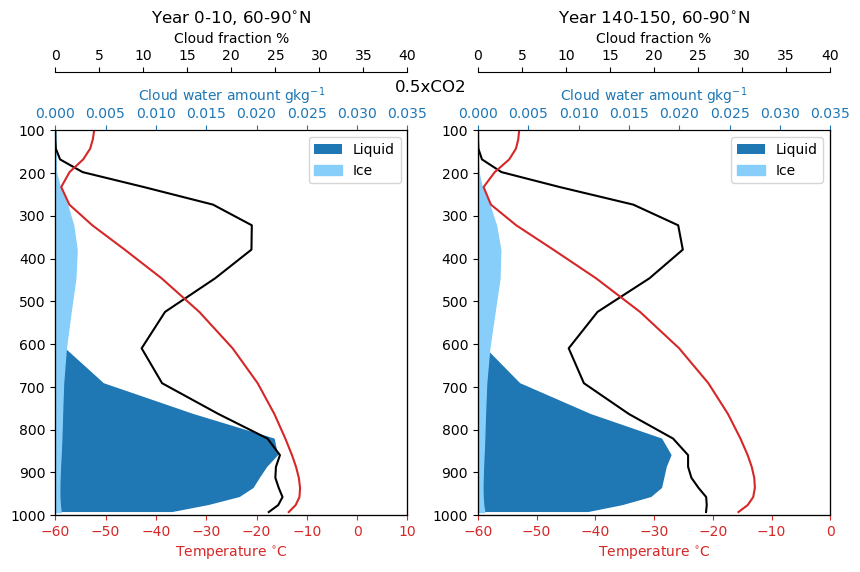

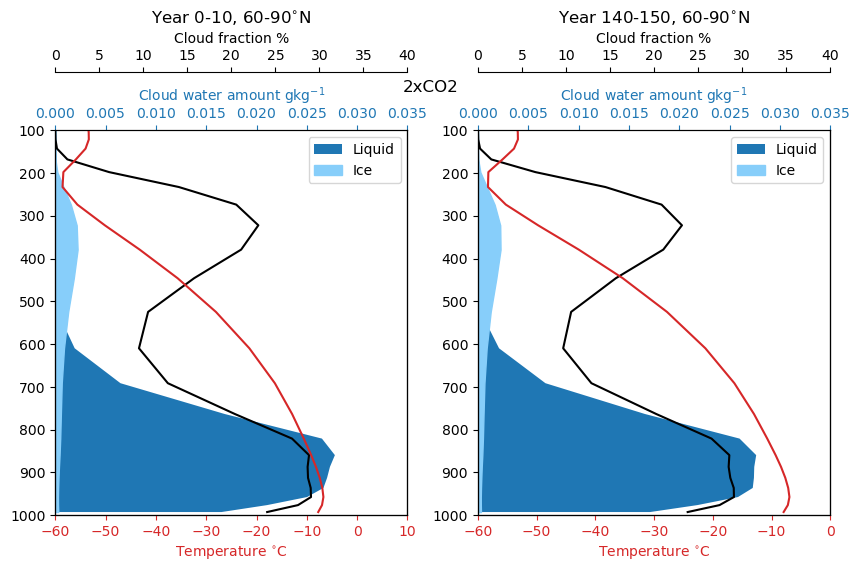

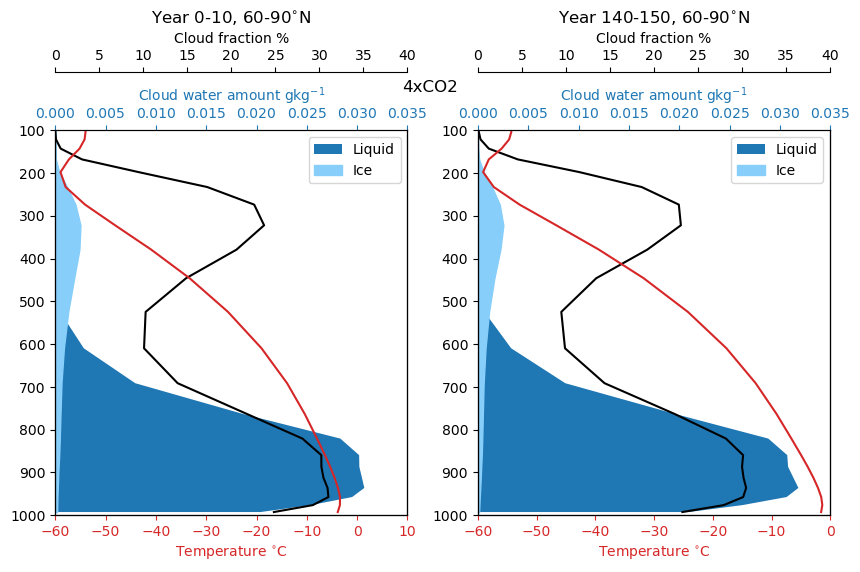

In [ ]:
# Plot cloud profiles for the Arctic

Arctic_limit = 60
ds_Arctic = functions.computeWeightedMean(ds.sel(lat=slice(Arctic_limit,90))).mean('time')

T_lim = 10
cldwater_lim = 0.035
cldfrc_lim = 40
first = 0
last = int(150-interval)

for co2_conc in ds_Arctic.co2_conc.values:
# Plot cloud profiles in units g/kg
    print(co2_conc)
    fig, axs = plt.subplots(1,2, figsize=[10,5])
    axl1 = axs[0]; axr1 = axs[1]

    title = fig.suptitle(co2_conc)
    # Plot first period to the left
    axl1.set_title('Year '+str(first)+'-'+str(first+interval)+', '+str(Arctic_limit)+'-90$^{\circ}$N')
    axl2 = axl1.twiny()
    axl3 = axl1.twiny()
    axl3.spines.top.set_position(("axes", 1.15))
    axl1.set_zorder(3)
    axl2.set_zorder(1)
    axl3.set_zorder(2)
    axl1.patch.set_visible(False)

    axl1.plot(ds_Arctic['T'].sel(co2_conc=str(co2_conc), period=first)-273.15, 
              ds_Arctic['lev'], label='Temperature', color='tab:red')
    
    axl2.fill_betweenx(ds_Arctic['lev'], np.zeros(len(ds_Arctic['lev'])), 
                       ds_Arctic['CLDLIQ'].sel(co2_conc=str(co2_conc), period=first)*1000, 
                       label='Liquid', zorder=1)
    axl2.fill_betweenx(ds_Arctic['lev'], np.zeros(len(ds_Arctic['lev'])),
                        ds_Arctic['CLDICE'].sel(co2_conc=co2_conc, period=first)*1000, 
                        label='Ice', color='lightskyblue', zorder=2)
    
    axl3.plot(ds_Arctic['CLOUD'].sel(co2_conc=str(co2_conc), period=first)*100, 
              ds_Arctic['lev'], color='black', label='Cloud fraction')
    
    axl2.legend()
    
    axl1.set_ylim([1000, 100])
    axl1.set_xlim([-60, T_lim])
    axl2.set_xlim([0, cldwater_lim])
    axl3.set_xlim([0, cldfrc_lim])

    axl1.set_xlabel('Temperature $^{\circ}$C')
    axl2.set_xlabel('Cloud water amount gkg$^{-1}$')
    axl3.set_xlabel('Cloud fraction %')

    axl1.xaxis.label.set_color('tab:red')
    axl2.xaxis.label.set_color('tab:blue')
    axl3.xaxis.label.set_color('black')
    axl1.tick_params(axis='x', colors='tab:red')
    axl2.tick_params(axis='x', colors='tab:blue')
    axl3.tick_params(axis='x', colors='black')

    # Plot last period to the right
    axr1.set_title('Year '+str(last)+'-'+str(last+interval)+', '+str(Arctic_limit)+'-90$^{\circ}$N')
    axr2 = axr1.twiny()
    axr3 = axr1.twiny()
    axr3.spines.top.set_position(("axes", 1.15))
    axr1.set_zorder(6)
    axr2.set_zorder(4)
    axr3.set_zorder(5)
    axr1.patch.set_visible(False)
    
    axr1.plot(ds_Arctic['T'].sel(co2_conc=str(co2_conc), period=last)-273.15, 
              ds_Arctic['lev'], label='Temperature', color='tab:red')
    
    axr2.fill_betweenx(ds_Arctic['lev'], np.zeros(len(ds_Arctic['lev'])), 
                       ds_Arctic['CLDLIQ'].sel(co2_conc=co2_conc, period=last)*1000, 
                       label='Liquid', zorder=1)
    axr2.fill_betweenx(ds_Arctic['lev'], np.zeros(len(ds_Arctic['lev'])), 
                       ds_Arctic['CLDICE'].sel(co2_conc=co2_conc, period=last)*1000, 
                       label='Ice', color='lightskyblue', zorder=2)
    
    axr3.plot(ds_Arctic['CLOUD'].sel(co2_conc=str(co2_conc), period=last)*100, 
              ds_Arctic['lev'], color='black', label='Cloud fraction')
    
    axr2.legend()

    axr1.set_ylim([1000, 100])
    axr1.set_xlim([-60, 0])
    axr2.set_xlim([0, 0.035])
    axr3.set_xlim([0, 40])

    axr1.set_xlabel('Temperature $^{\circ}$C')
    axr2.set_xlabel('Cloud water amount gkg$^{-1}$')
    axr3.set_xlabel('Cloud fraction %')

    axr1.xaxis.label.set_color('tab:red')
    axr2.xaxis.label.set_color('tab:blue')
    axr3.xaxis.label.set_color('black')
    axr1.tick_params(axis='x', colors='tab:red')
    axr2.tick_params(axis='x', colors='tab:blue')
    axr3.tick_params(axis='x', colors='black')



0.5xCO2
2xCO2
4xCO2


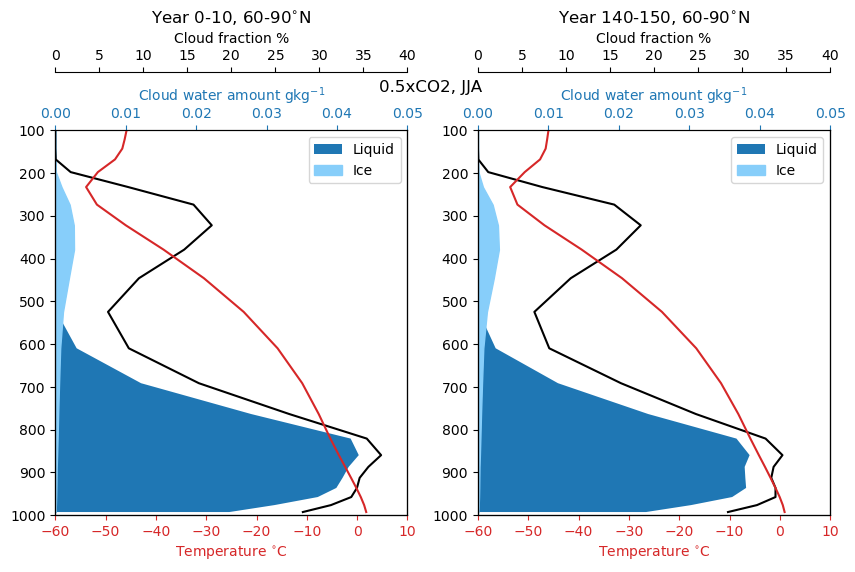

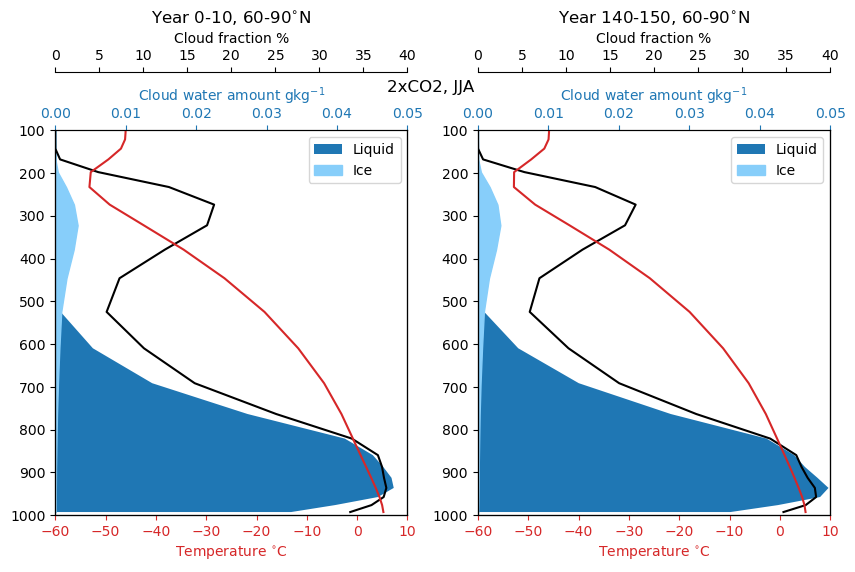

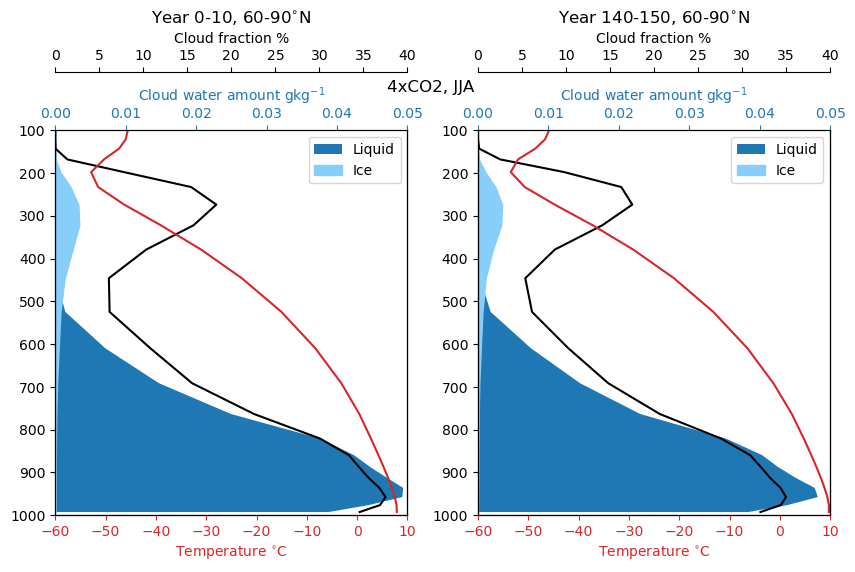

In [ ]:
# Plot cloud profiles for the Arctic

Arctic_limit = 60
season = 'JJA'
ds_Arctic = functions.computeSeasonalMean(ds, season=season)
ds_Arctic = functions.computeWeightedMean(ds_Arctic.sel(lat=slice(Arctic_limit,90)))

T_lim = 10
cldwater_lim = 0.05
cldfrc_lim = 40
first = 0
last = int(150-interval)

for co2_conc in ds_Arctic.co2_conc.values:
# Plot cloud profiles in units g/kg
    print(co2_conc)
    fig, axs = plt.subplots(1,2, figsize=[10,5])
    axl1 = axs[0]; axr1 = axs[1]

    fig.suptitle(co2_conc+', '+season)
    # Plot first period to the left
    axl1.set_title('Year '+str(first)+'-'+str(first+interval)+', '+str(Arctic_limit)+'-90$^{\circ}$N')
    axl2 = axl1.twiny()
    axl3 = axl1.twiny()
    axl3.spines.top.set_position(("axes", 1.15))
    axl1.set_zorder(3)
    axl2.set_zorder(1)
    axl3.set_zorder(2)
    axl1.patch.set_visible(False)

    axl1.plot(ds_Arctic['T'].sel(co2_conc=str(co2_conc), period=first)-273.15, 
              ds_Arctic['lev'], label='Temperature', color='tab:red')
    
    axl2.fill_betweenx(ds_Arctic['lev'], np.zeros(len(ds_Arctic['lev'])), 
                       ds_Arctic['CLDLIQ'].sel(co2_conc=co2_conc, period=first)*1000, 
                       label='Liquid', zorder=1)
    axl2.fill_betweenx(ds_Arctic['lev'], np.zeros(len(ds_Arctic['lev'])), 
                       ds_Arctic['CLDICE'].sel(co2_conc=co2_conc, period=first)*1000, 
                       label='Ice', color='lightskyblue', zorder=2)
    
    axl3.plot(ds_Arctic['CLOUD'].sel(co2_conc=str(co2_conc), period=first)*100, 
              ds_Arctic['lev'], color='black', label='Cloud fraction')
    
    axl2.legend()
    
    axl1.set_ylim([1000, 100])
    axl1.set_xlim([-60, T_lim])
    axl2.set_xlim([0, cldwater_lim])
    axl3.set_xlim([0, cldfrc_lim])

    axl1.set_xlabel('Temperature $^{\circ}$C')
    axl2.set_xlabel('Cloud water amount gkg$^{-1}$')
    axl3.set_xlabel('Cloud fraction %')

    axl1.xaxis.label.set_color('tab:red')
    axl2.xaxis.label.set_color('tab:blue')
    axl3.xaxis.label.set_color('black')
    axl1.tick_params(axis='x', colors='tab:red')
    axl2.tick_params(axis='x', colors='tab:blue')
    axl3.tick_params(axis='x', colors='black')

    # Plot last period to the right
    axr1.set_title('Year '+str(last)+'-'+str(last+interval)+', '+str(Arctic_limit)+'-90$^{\circ}$N')
    axr2 = axr1.twiny()
    axr3 = axr1.twiny()
    axr3.spines.top.set_position(("axes", 1.15))
    axr1.set_zorder(6)
    axr2.set_zorder(4)
    axr3.set_zorder(5)
    axr1.patch.set_visible(False)
    
    axr1.plot(ds_Arctic['T'].sel(co2_conc=str(co2_conc), period=last)-273.15, 
              ds_Arctic['lev'], label='Temperature', color='tab:red')
    axr2.fill_betweenx(ds_Arctic['lev'], np.zeros(len(ds_Arctic['lev'])), 
                       ds_Arctic['CLDLIQ'].sel(co2_conc=co2_conc, period=last)*1000, 
                       label='Liquid', zorder=1)
    axr2.fill_betweenx(ds_Arctic['lev'], np.zeros(len(ds_Arctic['lev'])), 
                       ds_Arctic['CLDICE'].sel(co2_conc=co2_conc, period=last)*1000, 
                       label='Ice', color='lightskyblue', zorder=2)
    
    axr3.plot(ds_Arctic['CLOUD'].sel(co2_conc=str(co2_conc), period=last)*100, 
              ds_Arctic['lev'], color='black', label='Cloud fraction')
    
    axr2.legend()

    axr1.set_ylim([1000, 100])
    axr1.set_xlim([-60, T_lim])
    axr2.set_xlim([0, cldwater_lim])
    axr3.set_xlim([0, cldfrc_lim])

    axr1.set_xlabel('Temperature $^{\circ}$C')
    axr2.set_xlabel('Cloud water amount gkg$^{-1}$')
    axr3.set_xlabel('Cloud fraction %')

    axr1.xaxis.label.set_color('tab:red')
    axr2.xaxis.label.set_color('tab:blue')
    axr3.xaxis.label.set_color('black')
    axr1.tick_params(axis='x', colors='tab:red')
    axr2.tick_params(axis='x', colors='tab:blue')
    axr3.tick_params(axis='x', colors='black')



### Plot vertically integrated cloud variables

#### Units:
TGCLDIWP, TGCLDIWP - [kg/m3]
CLDTOT - fraction
ICEFRAC - fraction

In [39]:
ds_test = xr.open_dataset(clouddir+'TGCLDIWP_piClim.nc')
ds_test

<xarray.Dataset> Size: 100MB
Dimensions:   (lat: 96, lon: 144, time: 1800)
Coordinates:
  * lat       (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon       (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time      (time) object 14kB 1920-01-15 00:00:00 ... 2069-12-15 00:00:00
Data variables:
    TGCLDIWP  (time, lat, lon) float32 100MB ...

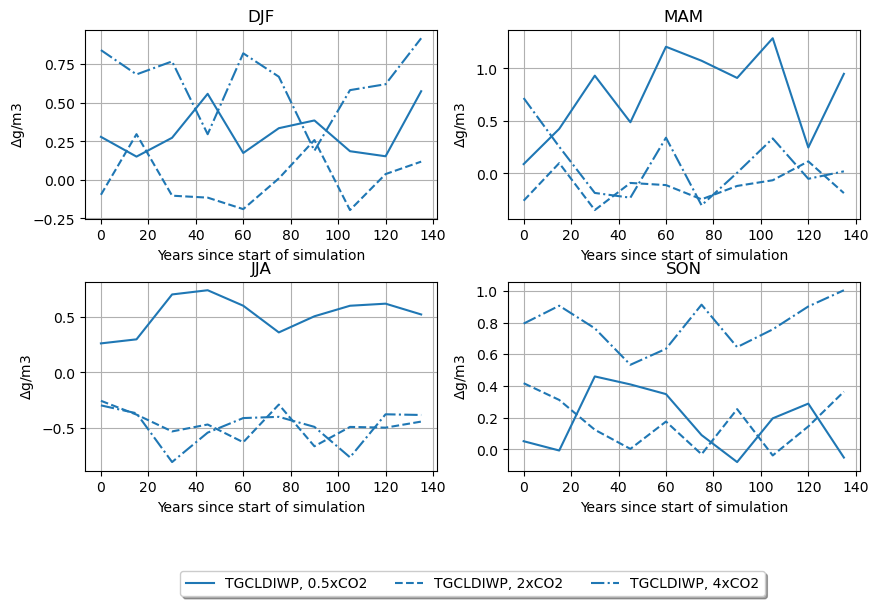

In [92]:
Arctic_limit = 60
seasons = ['DJF', 'MAM', 'JJA', 'SON']
variables = ['TGCLDIWP','TGCLDLWP', 'CLDTOT', 'ICEFRAC']
variables = ['TGCLDIWP']
var_colors = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']
exp_linestyles = ['-', '--', '-.']

piClim_Arctic = functions.computeWeightedMean(piClim_cloud.sel(lat=slice(Arctic_limit,90)))
ds_Arctic = functions.computeWeightedMean(ds.sel(lat=slice(Arctic_limit,90)))

fig, axs = plt.subplots(2, 2, figsize=[10,6])
for season, ax in zip(seasons, axs.flat):
    ds_Arctic_s = functions.computeSeasonalMean(ds_Arctic, season=season)
    piClim_Arctic_s = functions.computeSeasonalMean(piClim_Arctic, season=season)
    for j, var in enumerate(variables):
        for i, co2_conc in enumerate(ds_Arctic_s.co2_conc.values):
            if season==seasons[-1]:
                # add label
                if var == 'TGCLDLWP' or var == 'TGCLDIWP':
                    # Change unit to g/m3
                    ax.plot(ds_Arctic_s.period, 
                            (ds_Arctic_s[var].sel(co2_conc=co2_conc)-piClim_Arctic_s[var])*1000, 
                            linestyle=exp_linestyles[i], color=var_colors[j], label=var+', '+co2_conc)
                elif var == 'CLDTOT' or var=='ICEFRAC':
                    # Change unit to %
                    ax.plot(ds_Arctic_s.period, 
                            (ds_Arctic_s[var].sel(co2_conc=co2_conc)-piClim_Arctic_s[var])*100, 
                            linestyle=exp_linestyles[i], color=var_colors[j], label=var+', '+co2_conc)
            else:
                if var == 'TGCLDLWP' or var == 'TGCLDIWP':
                    # Change unit to g/m3
                    ax.plot(ds_Arctic_s.period, 
                            (ds_Arctic_s[var].sel(co2_conc=co2_conc)-piClim_Arctic_s[var])*1000, 
                            linestyle=exp_linestyles[i], color=var_colors[j])
                elif var == 'CLDTOT' or var=='ICEFRAC':
                    # Change unit to %
                    ax.plot(ds_Arctic_s.period, 
                            (ds_Arctic_s[var].sel(co2_conc=co2_conc)-piClim_Arctic_s[var])*100, 
                            linestyle=exp_linestyles[i], color=var_colors[j])

    
    #ax.set_ylim([-5, 5])
    ax.set_title(season)
    ax.grid()
    ax.set_xlabel('Years since start of simulation')
    #ax.set_ylabel('$\Delta$g/m3 and $\Delta$%')
    ax.set_ylabel('$\Delta$g/m3')

    # Shrink box size to make room for legend
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])

# Put a legend below last axis
ax.legend(loc='lower center', bbox_to_anchor=(-0.1, -0.7),
          fancybox=True, shadow=True, ncol=4)